In [2]:
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.style.use('ggplot')

In [3]:
df = pd.read_csv('data/online_shoppers_intention.csv')

In [9]:
df.groupby(['Revenue'])["PageValues"].agg(len)#.plot(kind ="bar", figsize=(9,9))

Revenue
False    10422.0
True      1908.0
Name: PageValues, dtype: float64

In [44]:
df.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


0.15474452554744525

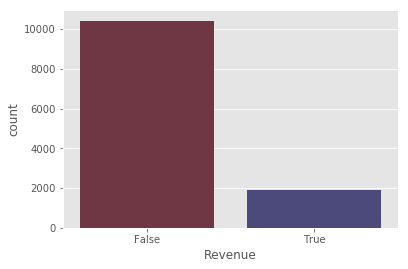

In [45]:
# what is the ratio of true/false --- visual and percentage of True?

# only 15.5% of customers in overall dataset made a purchase
sns.countplot(df['Revenue'], palette='icefire_r')
df["Revenue"].value_counts()[1]/df.shape[0]

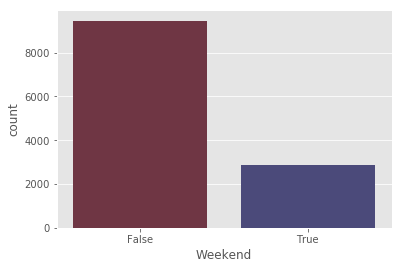

In [46]:
# far more purchases were made during the week

sns.countplot(df['Weekend'], palette='icefire_r')

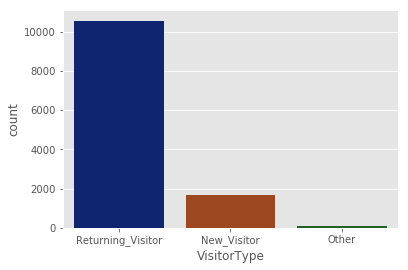

In [47]:
vis_plot = sns.countplot(df['VisitorType'], palette='dark')

In [48]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

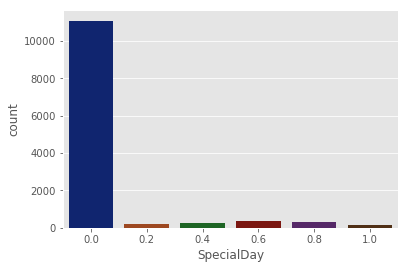

In [49]:
sns.countplot(df['SpecialDay'], palette='dark')

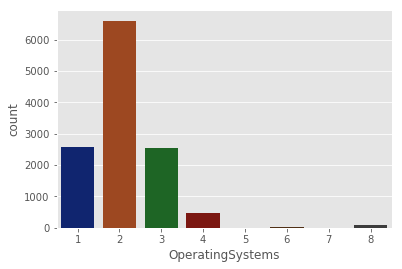

In [50]:
sns.countplot(df['OperatingSystems'], palette='dark')

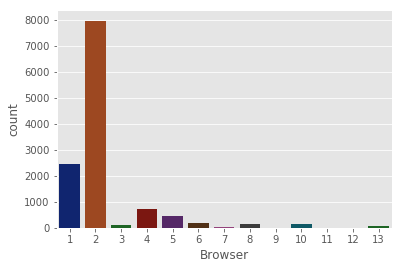

In [51]:
sns.countplot(df['Browser'], palette='dark')

In [52]:
df['Browser'].value_counts(normalize=True) * 100

2     64.566099
1     19.967559
4      5.969181
5      3.787510
6      1.411192
10     1.321979
8      1.094891
3      0.851582
13     0.494728
7      0.397405
12     0.081103
11     0.048662
9      0.008110
Name: Browser, dtype: float64

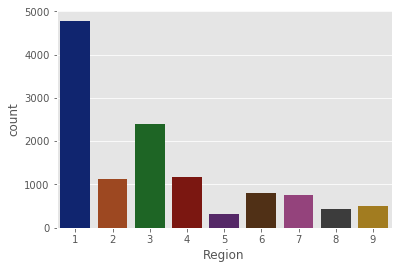

In [53]:
sns.countplot(df['Region'], palette='dark')

In [54]:
df['Region'].value_counts(normalize=True) * 100

1    38.767234
3    19.489051
4     9.586375
2     9.213301
6     6.528792
7     6.171938
9     4.144363
8     3.519870
5     2.579075
Name: Region, dtype: float64

In [55]:
df['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

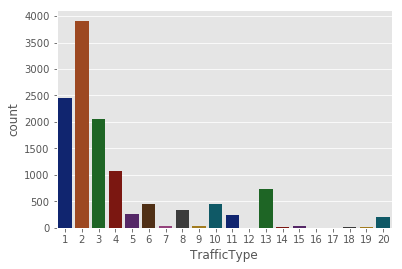

In [56]:
sns.countplot(df['TrafficType'], palette='dark')

In [57]:
df['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [58]:
Highest_BounceRates =df.groupby(['ProductRelated']).mean()[['ProductRelated_Duration','BounceRates','ExitRates','PageValues']].sort_values('BounceRates',ascending=False)
Highest_BounceRates.head()

,ProductRelated_Duration,BounceRates,ExitRates,PageValues
ProductRelated,,,,
1,16.759474,0.172594,0.183541,0.170681
0,0.000000,0.098158,0.127446,0.000000
2,62.648883,0.048856,0.104933,0.846367
3,117.771305,0.033990,0.077767,1.657080
377,11729.408040,0.032877,0.045246,0.000000


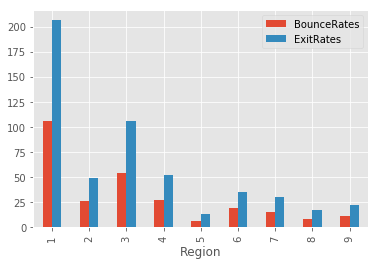

In [59]:
df.groupby(['Region'])['BounceRates','ExitRates'].sum().plot(kind ="bar")

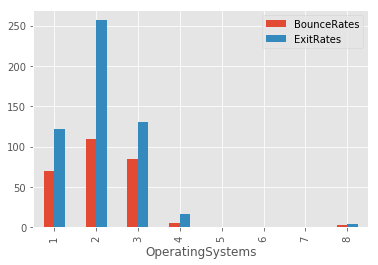

In [60]:
# browsers vs. Bounce/Exit rates
df.groupby(['OperatingSystems'])['BounceRates','ExitRates'].sum().plot(kind ="bar")

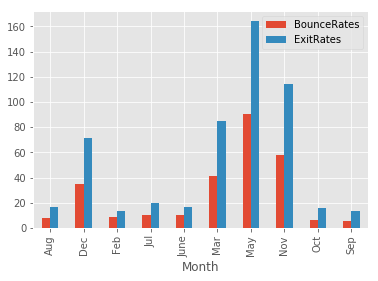

In [61]:
df.groupby(['Month'])['BounceRates','ExitRates'].sum().plot(kind ="bar")

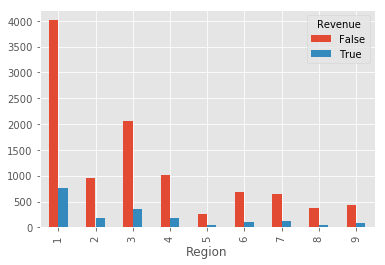

In [62]:
pd.crosstab(df['Region'],df['Revenue']).plot.bar()

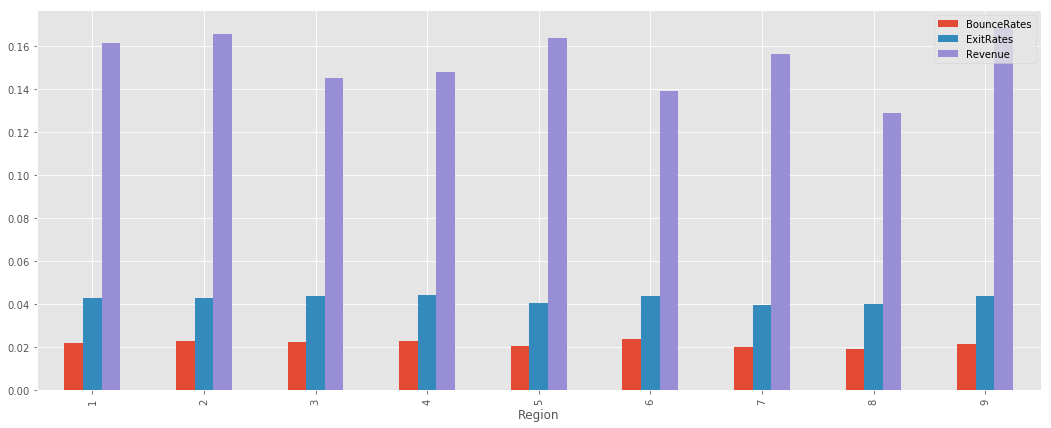

In [63]:
(df.groupby(['Region'])['BounceRates','ExitRates' ,"Revenue"].agg( 'mean')).plot.bar(figsize = (18,7))

In [64]:
list(df.columns)

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

In [65]:
df.groupby(['Region', 'Revenue']).agg(len)

Administrative  Administrative_Duration  Informational  \
Region Revenue                                                           
1      False              4009                   4009.0           4009   
       True                771                    771.0            771   
2      False               948                    948.0            948   
       True                188                    188.0            188   
3      False              2054                   2054.0           2054   
       True                349                    349.0            349   
4      False              1007                   1007.0           1007   
       True                175                    175.0            175   
5      False               266                    266.0            266   
       True                 52                     52.0             52   
6      False               693                    693.0            693   
       True                112                    112.0            112   
7      False               642                    642.0            642   
       True                119                    119.0            119   
8      False               378                    378.0            378   
       True                 56                     56.0             56   
9      False               425                    425.0            425   
       True                 86                     86.0             86   

                Informational_Duration  ProductRelated  \
Region Revenue                                           
1      False                    4009.0            4009   
       True                      771.0             771   
2      False                     948.0             948   
       True                      188.0             188   
3      False                    2054.0            2054   
       True                      349.0             349   
4      False                    1007.0            1007   
       True                      175.0             175   
5      False                     266.0             266   
       True                       52.0              52   
6      False                     693.0             693   
       True                      112.0             112   
7      False                     642.0             642   
       True                      119.0             119   
8      False                     378.0             378   
       True                       56.0              56   
9      False                     425.0             425   
       True                       86.0              86   

                ProductRelated_Duration  BounceRates  ExitRates  PageValues  \
Region Revenue                                                                
1      False                     4009.0       4009.0     4009.0      4009.0   
       True                       771.0        771.0      771.0       771.0   
2      False                      948.0        948.0      948.0       948.0   
       True                       188.0        188.0      188.0       188.0   
3      False                     2054.0       2054.0     2054.0      2054.0   
       True                       349.0        349.0      349.0       349.0   
4      False                     1007.0       1007.0     1007.0      1007.0   
       True                       175.0        175.0      175.0       175.0   
5      False                      266.0        266.0      266.0       266.0   
       True                        52.0         52.0       52.0        52.0   
6      False                      693.0        693.0      693.0       693.0   
       True                       112.0        112.0      112.0       112.0   
7      False                      642.0        642.0      642.0       642.0   
       True                       119.0        119.0      119.0       119.0   
8      False                      378.0        378.0      378.0       378.0   
       True                    

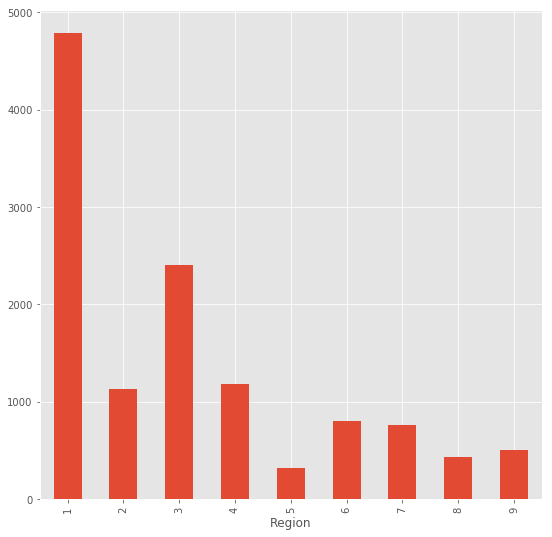

In [66]:
df.groupby(['Region'])["Revenue"].agg(len).plot(kind ="bar", figsize=(9,9))

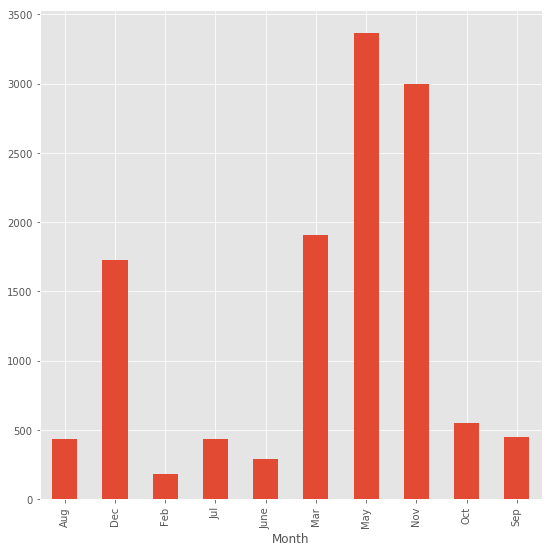

In [67]:
df.groupby(['Month'])["VisitorType"].agg(len).plot(kind ="bar", figsize=(9,9))

In [68]:
df['Month'].value_counts(normalize=True) * 100

May     27.283049
Nov     24.314680
Mar     15.466342
Dec     14.006488
Oct      4.452555
Sep      3.633414
Aug      3.511760
Jul      3.503650
June     2.335766
Feb      1.492295
Name: Month, dtype: float64

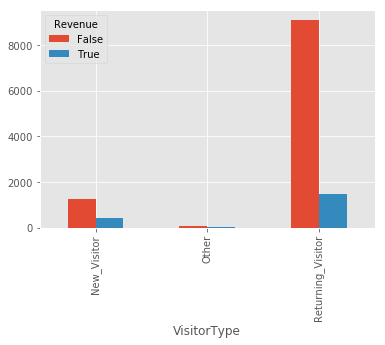

In [69]:
pd.crosstab(df['VisitorType'],df['Revenue']).plot.bar()

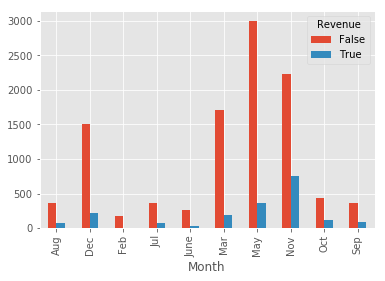

In [72]:
pd.crosstab(df['Month'],df['Revenue']).plot.bar()

In [70]:
df['VisitorType'].value_counts(normalize=True) * 100

Returning_Visitor    85.571776
New_Visitor          13.738848
Other                 0.689376
Name: VisitorType, dtype: float64

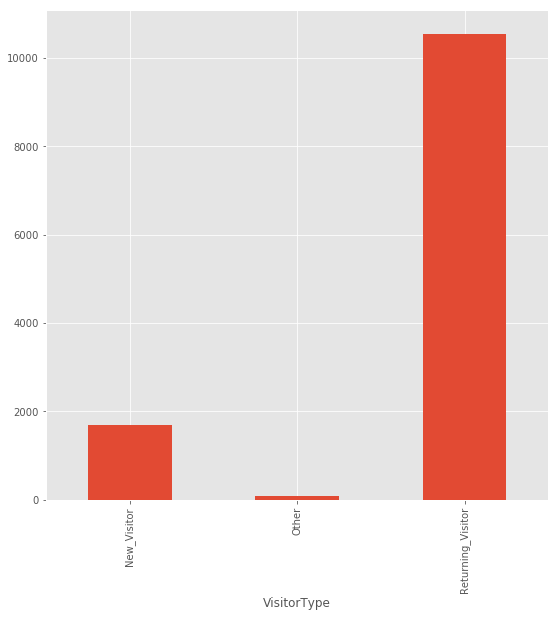

In [71]:
df.groupby(['VisitorType'])["ExitRates"].agg(len).plot(kind ="bar", figsize=(9,9))